In [22]:
import pandas as pd

In [23]:
shayneDf = pd.read_csv("/local/storage/rhlin_to_copy/CloneSeqExample/Mutations_Summary.txt", sep="\t")
sdf_a = shayneDf[shayneDf["Colony"] == "D"].sort_values(by = "Identifier")
sdf_a = sdf_a[ \
            ['ORF', 'Colony', 'Identifier', 'Desired Mutation Detected', \
             'Undesired Mutations Detected', 'Clean', 'Usable', 'Desired Mutation Score'] \
            ]
sdf_a = sdf_a.rename(columns = {"Desired Mutation Detected": "Status", \
                              "Undesired Mutations Detected": "Other Muts", "Usable": "Successful"}) \
                        .reset_index(drop=True)
sdf_a

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Desired Mutation Score
0,10002,D,10002_T743A_D,True,[],True,True,0.989263
1,10011,D,10011_G799A_D,True,[],True,True,0.997247
2,10016,D,10016_C1014G_D,True,[],True,True,1.000817
3,10037,D,10037_G1595C_D,True,[],True,True,1.017770
4,10037,D,10037_T1139G_D,True,[],True,True,0.958852
...,...,...,...,...,...,...,...,...
1654,9969,D,9969_G1228A_D,True,[],True,True,0.941238
1655,9970,D,9970_A377G_D,True,[],True,True,1.014736
1656,9989,D,9989_C596T_D,True,[],True,True,1.001226
1657,9990,D,9990_G1237A_D,True,[],True,True,0.918153


In [24]:
df_d = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_D_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_d

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,D,10002_T743A_D,True,['10002_G6T'],False,False,-1.605353
1,10011,D,10011_G799A_D,True,[],True,True,-3.235951
2,10016,D,10016_C1014G_D,True,[],True,True,-0.749125
3,10037,D,10037_G1595C_D,True,[],True,True,-0.159004
4,10037,D,10037_T1139G_D,True,[],True,True,-2.899521
...,...,...,...,...,...,...,...,...
1654,9969,D,9969_G1228A_D,True,[],True,True,-7.000729
1655,9970,D,9970_A377G_D,True,[],True,True,-1.342478
1656,9989,D,9989_C596T_D,True,['9989_C1242A'],False,False,-1.000000
1657,9990,D,9990_G1237A_D,True,[],True,True,-3.970869


In [25]:
df_wt = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_WT_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_wt

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,W,10002_T743A_W,False,['10002_G6T'],False,False,-inf
1,10011,W,10011_G799A_W,False,['10011_G1317T'],False,False,-inf
2,10016,W,10016_C1014G_W,False,[],True,False,-inf
3,10037,W,10037_G1595C_W,False,[],True,False,-inf
4,10037,W,10037_T1139G_W,False,[],True,False,-inf
...,...,...,...,...,...,...,...,...
1654,9969,W,9969_G1228A_W,False,[],True,False,-inf
1655,9970,W,9970_A377G_W,False,[],True,False,-inf
1656,9989,W,9989_C596T_W,False,['9989_C1242A'],False,False,-inf
1657,9990,W,9990_G1237A_W,False,[],True,False,-744.440072


In [26]:
df_d["Identifier_new"] = df_d["Identifier"].apply(lambda x: x[0:-2])
df_wt["Identifier_new"] = df_wt["Identifier"].apply(lambda x: x[0:-2])
df_wt = df_wt.rename(columns = {"Other Muts": "Other Muts WT"})

In [27]:
df_merge = pd.merge(df_d, df_wt[["Identifier_new", "Other Muts WT"]].drop_duplicates(), on = ["Identifier_new"], how = "left")
df_merge["Other Muts"] = df_merge.apply(lambda row: list(set(eval(row["Other Muts"])) - set(eval(row["Other Muts WT"]))), axis = 1)

In [28]:
df_merge["Clean"] = df_merge["Other Muts"].apply(lambda x: len(x) == 0)

In [29]:
df_richard = df_merge.sort_values(by="Identifier")[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_richard

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_D,True,[],True,False
1,10011_G799A_D,True,[],True,True
2,10016_C1014G_D,True,[],True,True
3,10037_G1595C_D,True,[],True,True
4,10037_T1139G_D,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_D,True,[],True,True
1655,9970_A377G_D,True,[],True,True
1656,9989_C596T_D,True,[],True,False
1657,9990_G1237A_D,True,[],True,True


In [30]:
df_shayne = sdf_a[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_shayne

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_D,True,[],True,True
1,10011_G799A_D,True,[],True,True
2,10016_C1014G_D,True,[],True,True
3,10037_G1595C_D,True,[],True,True
4,10037_T1139G_D,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_D,True,[],True,True
1655,9970_A377G_D,True,[],True,True
1656,9989_C596T_D,True,[],True,True
1657,9990_G1237A_D,True,[],True,True


In [31]:
df_compare = pd.merge(df_richard, df_shayne, on = ["Identifier"], how = "left")
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: eval(x))
df_compare

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
0,10002_T743A_D,True,[],True,False,True,[],True,True
1,10011_G799A_D,True,[],True,True,True,[],True,True
2,10016_C1014G_D,True,[],True,True,True,[],True,True
3,10037_G1595C_D,True,[],True,True,True,[],True,True
4,10037_T1139G_D,True,[],True,True,True,[],True,True
...,...,...,...,...,...,...,...,...,...
1654,9969_G1228A_D,True,[],True,True,True,[],True,True
1655,9970_A377G_D,True,[],True,True,True,[],True,True
1656,9989_C596T_D,True,[],True,False,True,[],True,True
1657,9990_G1237A_D,True,[],True,True,True,[],True,True


In [32]:
status = df_compare[df_compare["Status_x"] != df_compare["Status_y"]]

In [39]:
len(status)

12

In [34]:
def parse_variants(x):
    return sorted([item.split("_")[1] for item in x])
df_compare["Other Muts_x"] = df_compare["Other Muts_x"].apply(parse_variants)
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: sorted(x))
df_compare[df_compare["Other Muts_x"] != df_compare["Other Muts_y"]]

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
35,10225_C43A_D,True,[],True,True,True,"[C29Gap Before, G62Gap Before]",False,False
36,10225_G169A_D,True,[],True,True,True,"[C29Gap Before, G62Gap Before]",False,False
56,10528_A899G_D,True,[],True,True,True,"[C457Gap Before, T487Gap Before]",False,False
57,10528_C713A_D,True,[],True,True,True,"[C457Gap Before, T487Gap Before]",False,False
58,10528_G245A_D,True,[],True,True,True,"[C457Gap Before, T487Gap Before]",False,False
...,...,...,...,...,...,...,...,...,...
1634,9744_G35A_D,False,"[C41A, G676A]",False,False,False,[G676A],False,False
1642,9862_A902C_D,True,[G366A],False,False,True,[],True,True
1643,9862_G25A_D,True,[G366A],False,False,True,[],True,True
1644,9862_G510A_D,True,[G366A],False,False,True,[],True,True


In [58]:
def removeIndels(otherMuts):
    return [x for x in otherMuts if not "Gap" in x and not "Missing" in x]
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(removeIndels)

In [59]:
ot_comparison = df_compare[df_compare["Other Muts_x"] != df_compare["Other Muts_y"]]

In [60]:
ot_comparison

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
123,11500_G1604A_D,True,"[C828G, T1836C]",False,False,True,[C828G],False,False
124,11500_G1858A_D,True,"[C828G, T1836C]",False,False,True,[C828G],False,False
293,13791_A119G_D,True,"[A314G, A381G]",False,False,True,[A381G],False,False
294,13791_G296C_D,True,"[A314G, A381G]",False,False,True,[A381G],False,False
327,14166_T626C_D,False,[T662A],False,False,False,"[T660C, T662A]",False,False
633,3078_A412G_D,True,"[A682G, A701G, T781G]",False,False,True,[],True,True
634,3078_G206A_D,True,"[A682G, A701G, T781G]",False,False,True,[],True,True
635,3078_T296C_D,True,"[A682G, A701G, T781G]",False,False,True,[],True,True
808,450_C173T_D,True,[C15T],False,False,True,[],True,True
846,4727_A322T_D,True,"[A202T, A261G, A82T, C102T, C288T, C408T, C78T...",False,False,True,"[A261G, A82T, C102T, C288T, C78T, C93T, G371C,...",False,False


In [37]:
# 14166_T626C_D

In [38]:
import matplotlib.pyplot as plt

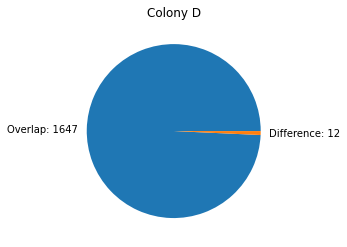

In [40]:
title = plt.title("Colony D")
pie_chart = plt.pie(x=[1647, 12], labels=["Overlap: 1647", "Difference: 12"])

In [62]:
len(ot_comparison)

37

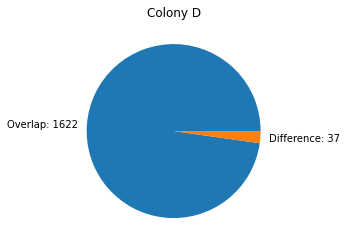

In [65]:
title = plt.title("Colony D")
pie_chart = plt.pie(x=[1622, 37], labels=["Overlap: 1622", "Difference: 37"])